# Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.signal import savgol_filter 

# Load data

In [13]:
df = pd.read_parquet("./Cleaned/restructured.parquet")

df.reset_index(inplace=True)
df.drop_duplicates(subset='timestamp',inplace=True)
df.sort_values(by='timestamp',inplace=True)
df.set_index('timestamp',inplace=True)

print(set(df['lon']))
print(df)

{36.887, 36.923, 36.829, 36.882, 36.755, 36.772, 36.821, 36.841, 36.799, 36.733, 36.791, 36.854, 36.811, 36.754, 36.885, 36.658, 37.001, 36.914, 36.782, 36.866, 36.789, 36.955, 36.693, 36.801, 36.773, 36.725, 36.785, 36.777, 36.781, 36.793, 36.694, 36.743, 36.87, 36.769, 36.912, 36.825, 36.797, 36.929, 36.953, 36.857, 36.879, 36.862, 36.79, 36.915, 36.939, 36.8, 36.872, 36.86, 36.776}
                                  P1         P2   humidity  temperature   
timestamp                                                                 
2018-01-01 00:02:00+00:00  27.200000  12.400000  55.700000        20.60  \
2018-01-01 00:05:00+00:00  18.430000  12.130000        NaN          NaN   
2018-01-01 00:06:00+00:00        NaN        NaN  55.900000        20.60   
2018-01-01 00:08:00+00:00  31.170000  12.870000        NaN          NaN   
2018-01-01 00:09:00+00:00  31.170000  12.870000  56.100000        20.60   
...                              ...        ...        ...          ...   
2023-05-04 1

# Fill Nan with mean

In [3]:
for column in df.columns:
    df[column].fillna(method='ffill', inplace=True)

# Replacing outliers by mean

In [4]:
df[(df['temperature'] > 100)] = np.mean(df['temperature'])

# Plotting

## Temperature

                           temperature
timestamp                             
2021-08-09 08:02:00+00:00    22.757143
2021-08-09 08:09:00+00:00    22.185714
2021-08-09 08:13:00+00:00    23.371429
2021-08-09 08:33:00+00:00    23.588889
2021-08-09 08:37:00+00:00    22.837500
...                                ...
2021-08-30 19:50:00+00:00    22.840000
2021-08-30 19:54:00+00:00    21.500000
2021-08-30 19:56:00+00:00    21.833333
2021-08-30 19:57:00+00:00    21.325000
2021-08-30 19:59:00+00:00    21.850000

[7682 rows x 1 columns]


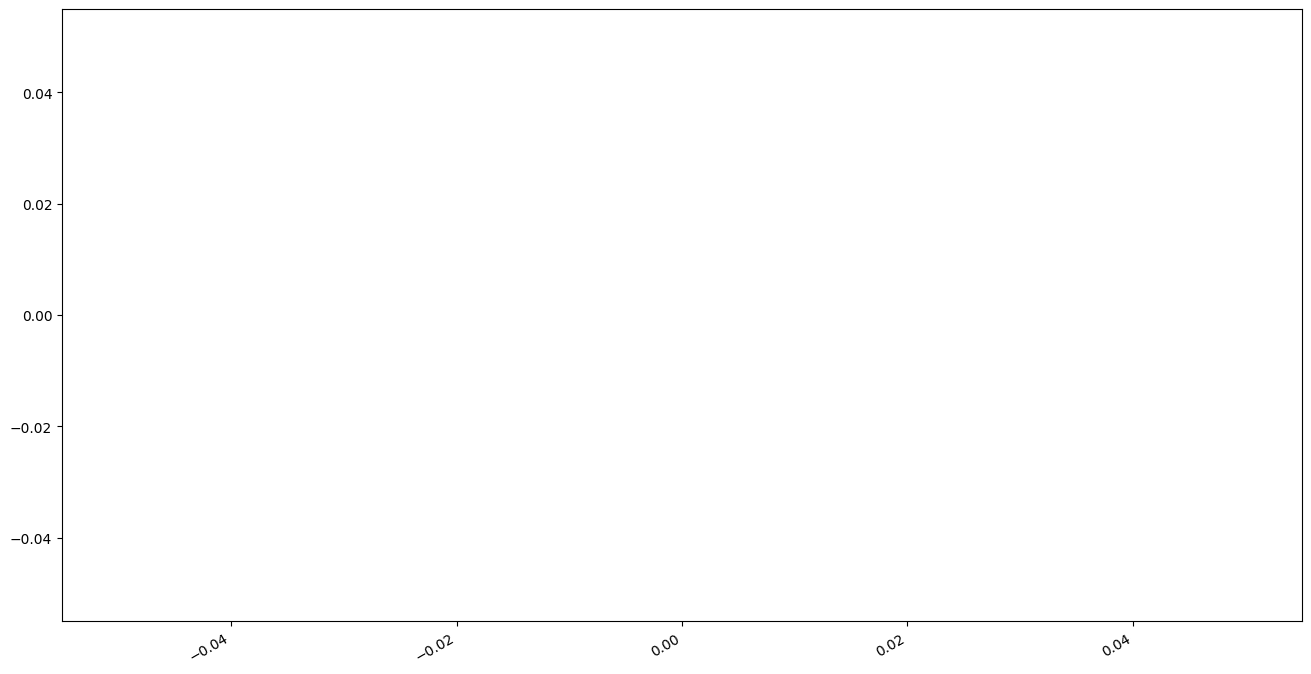

In [26]:
fig = plt.figure('temperature', figsize=(16,9))
temperature = df['2021-08-09 08:00:00+00:00':'2021-08-30 20:00:00+00:00'][['temperature']].loc[df['lon'] == 36.887]
smoothed = df['2021-08-09 08:00:00+00:00':'2022-08-30 20:00:00+00:00'][['temperature']].loc[df['lon'] == 36.923]
# smoothed = savgol_filter(temperature['temperature'],100,3)

print(smoothed)
# plt.plot(temperature.index,temperature.temperature)
plt.plot(smoothed.index,smoothed.temperature)
plt.gcf().autofmt_xdate()

## Humidity

                            humidity
timestamp                           
2021-01-15 15:20:00+00:00  56.100000
2021-01-15 15:21:00+00:00  56.100000
2021-01-15 15:22:00+00:00  53.300000
2021-01-15 15:23:00+00:00  56.300000
2021-01-15 15:24:00+00:00  53.500000
...                              ...
2022-01-30 15:26:00+00:00  56.800000
2022-01-30 15:27:00+00:00  60.075000
2022-01-30 15:28:00+00:00  56.833333
2022-01-30 15:29:00+00:00  69.850000
2022-01-30 15:30:00+00:00  52.166667

[508873 rows x 1 columns]


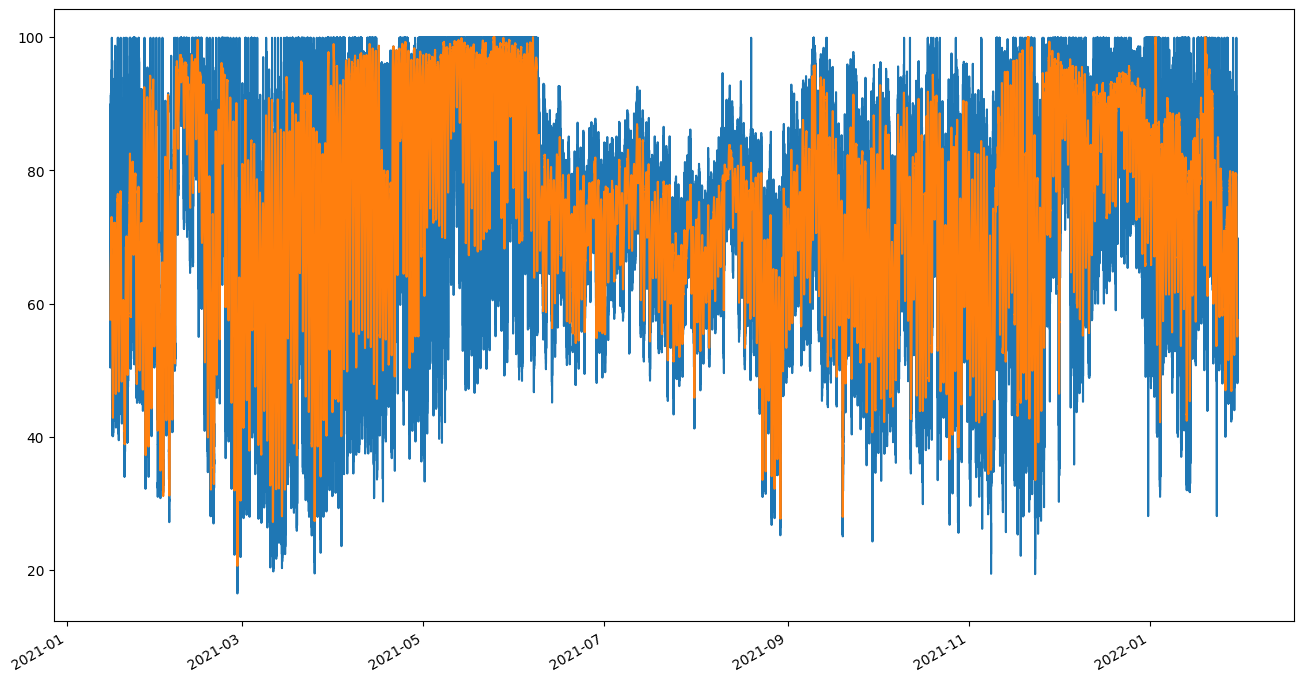

In [7]:
fig = plt.figure('humidity', figsize=(16,9))
humidity = df['2021-01-15 15:20:00+00:00':'2022-01-30 15:30:00+00:00'][['humidity']]
smoothed = savgol_filter(humidity['humidity'],500,3)
smoothed = smoothed.clip(0,100)

print(humidity)
plt.plot(humidity.index,humidity.humidity)
plt.plot(humidity.index,smoothed)
plt.gcf().autofmt_xdate()

## P0

                                  P0
timestamp                           
2021-01-15 08:00:00+00:00  16.233333
2021-01-15 08:01:00+00:00   8.100000
2021-01-15 08:02:00+00:00  21.500000
2021-01-15 08:03:00+00:00  10.000000
2021-01-15 08:04:00+00:00  10.600000
...                              ...
2021-01-15 19:56:00+00:00  25.965000
2021-01-15 19:57:00+00:00  17.500000
2021-01-15 19:58:00+00:00  10.000000
2021-01-15 19:59:00+00:00  32.200000
2021-01-15 20:00:00+00:00  11.000000

[691 rows x 1 columns]


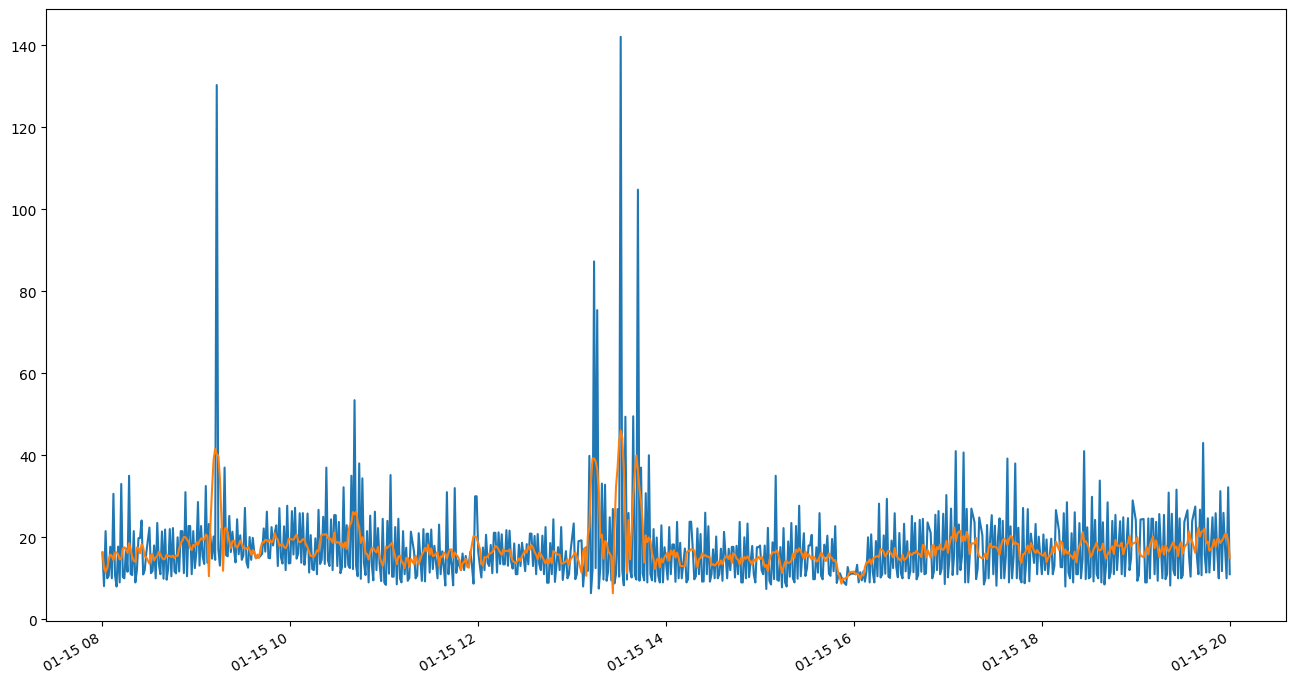

In [18]:
fig = plt.figure('P0', figsize=(16,9))
P0 = df['2021-01-15 08:00:00+00:00':'2021-01-15 20:00:00+00:00'][['P0']]
smoothed = savgol_filter(P0['P0'],10,3)

print(P0)
plt.plot(P0.index,P0.P0)
plt.plot(P0.index,smoothed)
plt.gcf().autofmt_xdate()

## P1

                                  P1
timestamp                           
2021-01-15 15:20:00+00:00  39.700000
2021-01-15 15:21:00+00:00  20.000000
2021-01-15 15:22:00+00:00  13.600000
2021-01-15 15:23:00+00:00  35.500000
2021-01-15 15:24:00+00:00  17.200000
...                              ...
2022-01-30 15:26:00+00:00  26.712500
2022-01-30 15:27:00+00:00  12.225000
2022-01-30 15:28:00+00:00  32.816667
2022-01-30 15:29:00+00:00  24.133333
2022-01-30 15:30:00+00:00  10.083333

[508873 rows x 1 columns]


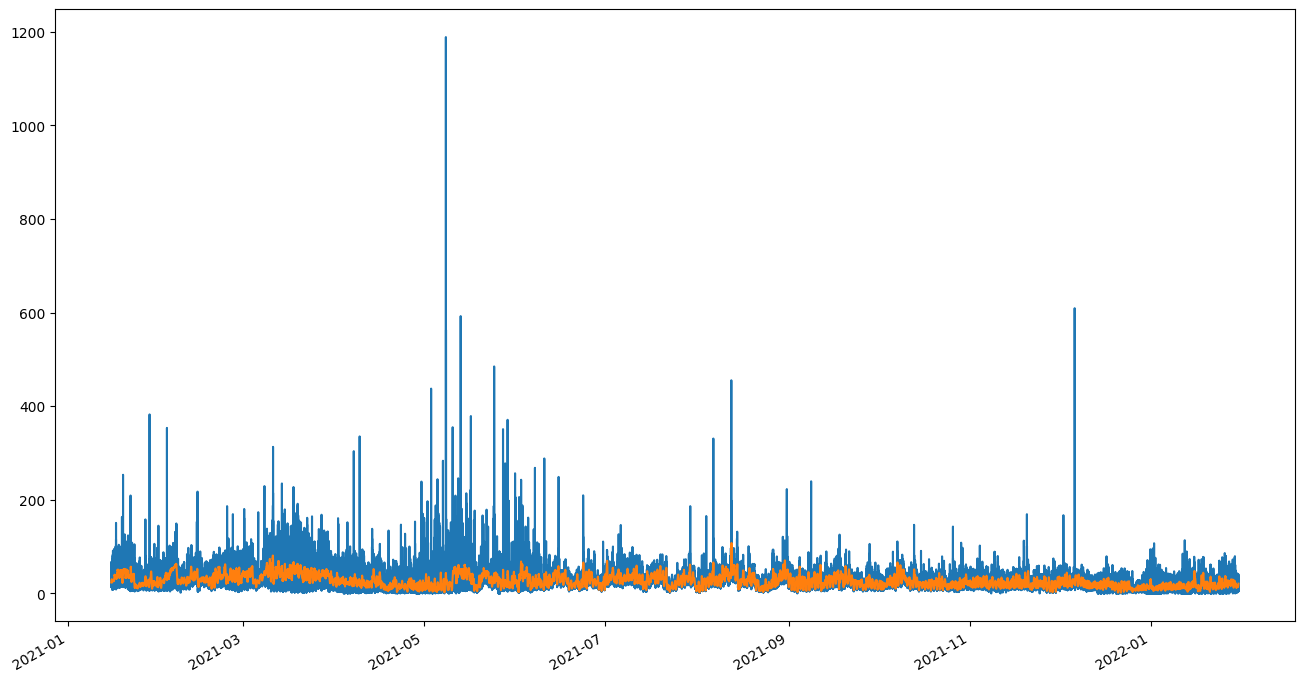

In [9]:
fig = plt.figure('P1', figsize=(16,9))
P1 = df['2021-01-15 15:20:00+00:00':'2022-01-30 15:30:00+00:00'][['P1']]
smoothed = savgol_filter(P1['P1'],500,3)

print(P1)
plt.plot(P1.index,P1.P1)
plt.plot(P1.index,smoothed)
plt.gcf().autofmt_xdate()

## P2

                                  P2
timestamp                           
2021-01-15 15:20:00+00:00  33.500000
2021-01-15 15:21:00+00:00  18.000000
2021-01-15 15:22:00+00:00  13.000000
2021-01-15 15:23:00+00:00  31.250000
2021-01-15 15:24:00+00:00  15.300000
...                              ...
2022-01-30 15:26:00+00:00  23.262500
2022-01-30 15:27:00+00:00  11.512500
2022-01-30 15:28:00+00:00  29.083333
2022-01-30 15:29:00+00:00  20.533333
2022-01-30 15:30:00+00:00   9.383333

[508873 rows x 1 columns]


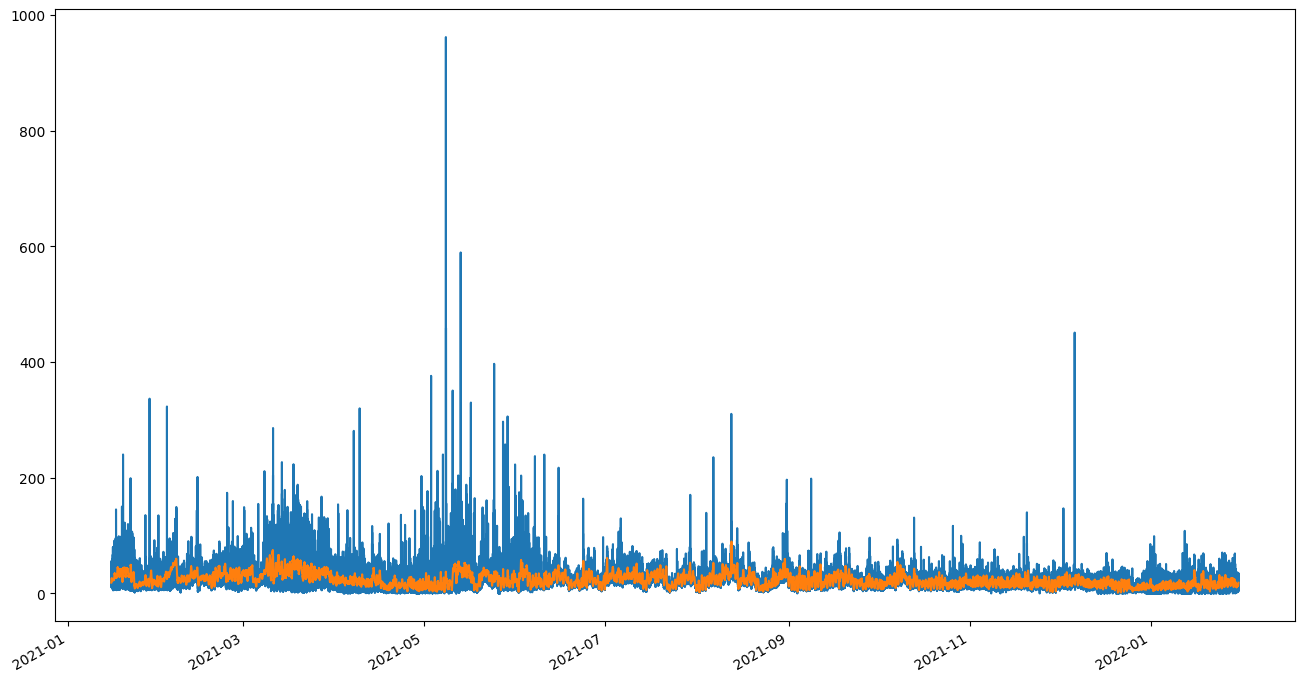

In [10]:
fig = plt.figure('P2', figsize=(16,9))
P2 = df['2021-01-15 08:00:00+00:00':'2022-01-15 20:00:00+00:00'][['P2']]
smoothed = savgol_filter(P2['P2'],500,3)

print(P2)
plt.plot(P2.index,P2.P2)
plt.plot(P2.index,smoothed)
plt.gcf().autofmt_xdate()